In [1]:
#Imports and Setup

import numpy as np
import pandas as pd
import scipy as sp
from scipy.ndimage.filters import gaussian_filter as smooth

%matplotlib inline
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = 16, 9
plt.rcParams['lines.linewidth'] = 3

font = {'weight' : 'normal',
      'size'   : 17}

plt.rc('font', **font)

import fair
from fair.fair_inverse_model import co2_conc_total as rf_to_conc
from fair.fair_inverse_model import annual_emissions_calc2 as conc_to_emissions
from fair.forward_multiple_GHG import fair_scm as FAIR_model

import data_creator

fair.__version__

'1.0.1'

In [2]:
#Create data file

output_co2_fe_3PD = data_creator.data_gen(datafile = 'RCP3PD')

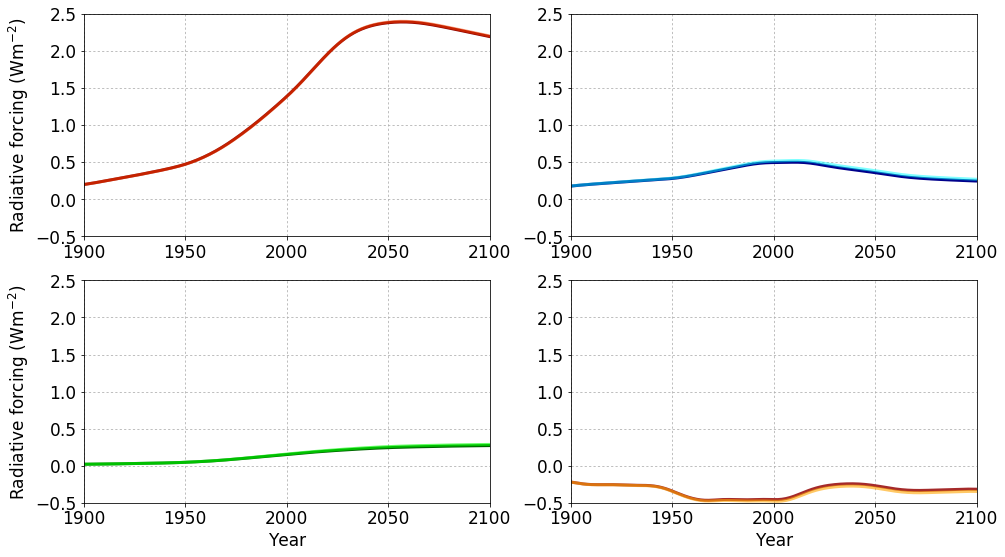

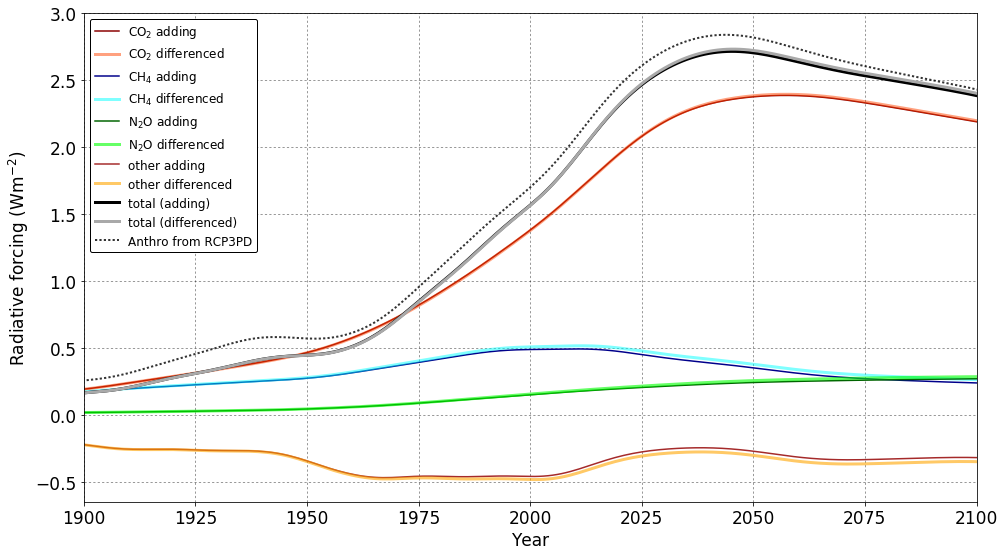

In [9]:
#plot radiative forcings adding vs differencing (FAIR STANDARD PARAMS)

time = np.arange(1765,2501)

RF_adding_3PD_fair = output_co2_fe_3PD['adding_fair']['forcing']['CO2'] + \
                        output_co2_fe_3PD['adding_fair']['forcing']['CH4'] + \
                        output_co2_fe_3PD['adding_fair']['forcing']['N2O'] + \
                        output_co2_fe_3PD['adding_fair']['forcing']['other']

RF_diff_3PD_fair = output_co2_fe_3PD['differencing_fair']['forcing']['CO2'] + \
                        output_co2_fe_3PD['differencing_fair']['forcing']['CH4'] + \
                        output_co2_fe_3PD['differencing_fair']['forcing']['N2O'] + \
                        output_co2_fe_3PD['differencing_fair']['forcing']['other']            
            

fig1 = plt.figure()

ax1 = fig1.add_subplot(221)
ax1.plot(time, output_co2_fe_3PD['adding_fair']['forcing']['CO2'], color = 'darkred')
ax1.plot(time, output_co2_fe_3PD['differencing_fair']['forcing']['CO2'], color = 'orangered', alpha = 0.5)
ax1.grid(True, linestyle = ':')
ax1.set_xlim(1900,2100)
ax1.set_ylim(-0.5,2.5)
ax1.set_ylabel('Radiative forcing (Wm$^{-2}$)')

ax2 = fig1.add_subplot(222)
ax2.plot(time, output_co2_fe_3PD['adding_fair']['forcing']['CH4'], color = 'darkblue')
ax2.plot(time, output_co2_fe_3PD['differencing_fair']['forcing']['CH4'], color = 'cyan', alpha = 0.5)
ax2.grid(True, linestyle = ':')
ax2.set_xlim(1900,2100)
ax2.set_ylim(-0.5,2.5)

ax3 = fig1.add_subplot(223)
ax3.plot(time, output_co2_fe_3PD['adding_fair']['forcing']['N2O'], color = 'darkgreen')
ax3.plot(time, output_co2_fe_3PD['differencing_fair']['forcing']['N2O'], color = 'lime', alpha = 0.6)
ax3.grid(True, linestyle = ':')
ax3.set_xlim(1900,2100)
ax3.set_xlabel('Year')
ax3.set_ylabel('Radiative forcing (Wm$^{-2}$)')
ax3.set_ylim(-0.5,2.5)

ax4 = fig1.add_subplot(224)
ax4.plot(time, output_co2_fe_3PD['adding_fair']['forcing']['other'], color = 'brown')
ax4.plot(time, output_co2_fe_3PD['differencing_fair']['forcing']['other'], color = 'orange', alpha = 0.6)
ax4.grid(True, linestyle = ':')
ax4.set_xlim(1900,2100)
ax4.set_xlabel('Year')
ax4.set_ylim(-0.5,2.5)

fig4 = plt.figure()
ax5 = fig4.add_subplot(111)
ax5.plot(time, output_co2_fe_3PD['adding_fair']['forcing']['CO2'], color = 'darkred', linewidth = 1.5, label = 'CO$_2$ adding')
ax5.plot(time, output_co2_fe_3PD['differencing_fair']['forcing']['CO2'], color = 'orangered', alpha = 0.5, label = 'CO$_2$ differenced')
ax5.plot(time, output_co2_fe_3PD['adding_fair']['forcing']['CH4'], color = 'darkblue', linewidth = 1.5, label = 'CH$_4$ adding')
ax5.plot(time, output_co2_fe_3PD['differencing_fair']['forcing']['CH4'], color = 'cyan', alpha = 0.5, label = 'CH$_4$ differenced')
ax5.plot(time, output_co2_fe_3PD['adding_fair']['forcing']['N2O'], color = 'darkgreen', linewidth = 1.5, label = 'N$_2$O adding')
ax5.plot(time, output_co2_fe_3PD['differencing_fair']['forcing']['N2O'], color = 'lime', alpha = 0.6, label = 'N$_2$O differenced')
ax5.plot(time, output_co2_fe_3PD['adding_fair']['forcing']['other'], color = 'brown', linewidth = 1.5, label = 'other adding')
ax5.plot(time, output_co2_fe_3PD['differencing_fair']['forcing']['other'], color = 'orange', alpha = 0.6, label = 'other differenced')

ax5.plot(time, RF_adding_3PD_fair, color = 'black', label = 'total (adding)')
ax5.plot(time, RF_diff_3PD_fair, color = 'darkgrey', label = 'total (differenced)')

ax5.plot(time, output_co2_fe_3PD['adding_fair']['forcing']['anthro_0'], ':', color = 'black', alpha = 0.8, linewidth = 2, label = 'Anthro from RCP3PD')

ax5.grid(True, linestyle = ':', color = 'black', alpha = 0.5)
ax5.set_xlim(1900,2100)
ax5.legend(loc = 'upper left', framealpha = 1, shadow = False, edgecolor = 'black', fontsize=12)
ax5.set_ylabel('Radiative forcing (Wm$^{-2}$)')
ax5.set_xlabel('Year')

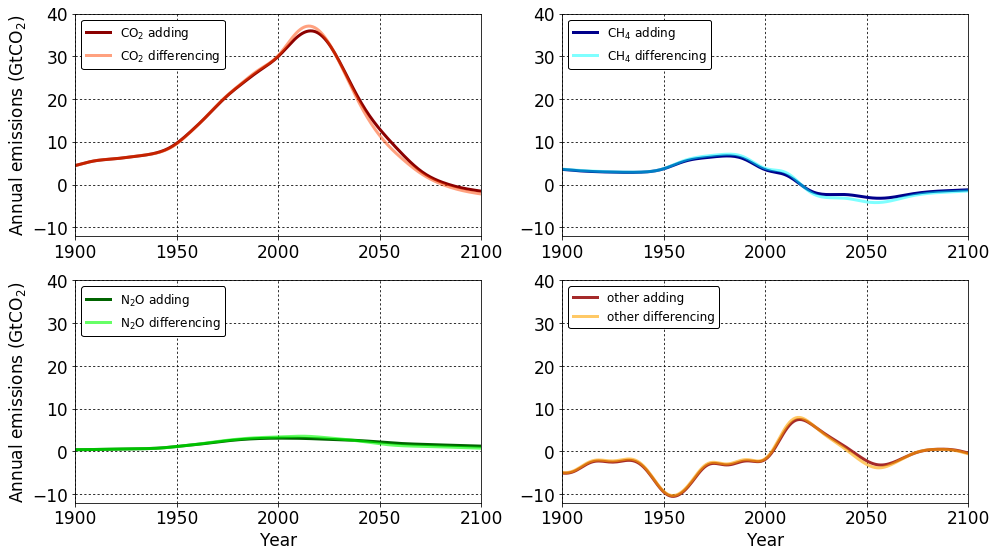

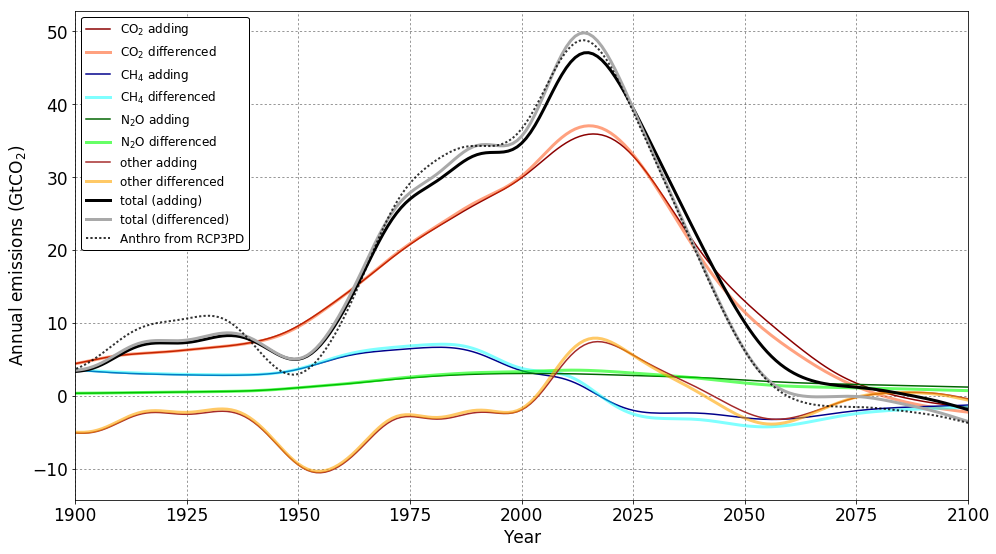

In [8]:
#plot emissions adding vs differencing (FAIR STANDARD PARAMS)

total_adding_3PD_fair = output_co2_fe_3PD['adding_fair']['emissions']['CO2'] + \
                        output_co2_fe_3PD['adding_fair']['emissions']['CH4'] + \
                        output_co2_fe_3PD['adding_fair']['emissions']['N2O'] + \
                        output_co2_fe_3PD['adding_fair']['emissions']['other']

total_diff_3PD_fair = output_co2_fe_3PD['differencing_fair']['emissions']['CO2'] + \
                        output_co2_fe_3PD['differencing_fair']['emissions']['CH4'] + \
                        output_co2_fe_3PD['differencing_fair']['emissions']['N2O'] + \
                        output_co2_fe_3PD['differencing_fair']['emissions']['other']            
            
time = np.arange(1765,2501)

fig2 = plt.figure()
ax1 = fig2.add_subplot(221)
ax1.plot(time, output_co2_fe_3PD['adding_fair']['emissions']['CO2'], color = 'darkred', label = 'CO$_2$ adding')
ax1.plot(time, output_co2_fe_3PD['differencing_fair']['emissions']['CO2'], color = 'orangered', alpha = 0.5, label = 'CO$_2$ differencing')
ax1.grid(True, linestyle = ':', color = 'black')
ax1.set_xlim(1900,2100)
ax1.set_ylim(-12.,40.)
ax1.set_ylabel('Annual emissions (GtCO$_2$)')
ax1.legend(loc = 'upper left', framealpha = 1, shadow = False, edgecolor = 'black', fontsize=12)

ax2 = fig2.add_subplot(222)
ax2.plot(time, output_co2_fe_3PD['adding_fair']['emissions']['CH4'], color = 'darkblue', label = 'CH$_4$ adding')
ax2.plot(time, output_co2_fe_3PD['differencing_fair']['emissions']['CH4'], color = 'cyan', alpha = 0.5, label = 'CH$_4$ differencing')
ax2.grid(True, linestyle = ':', color = 'black')
ax2.set_xlim(1900,2100)
ax2.set_ylim(-12.,40.)
ax2.legend(loc = 'upper left', framealpha = 1, shadow = False, edgecolor = 'black', fontsize=12)

ax3 = fig2.add_subplot(223)
ax3.plot(time, output_co2_fe_3PD['adding_fair']['emissions']['N2O'], color = 'darkgreen', label = 'N$_2$O adding')
ax3.plot(time, output_co2_fe_3PD['differencing_fair']['emissions']['N2O'], color = 'lime', alpha = 0.6, label = 'N$_2$O differencing')
ax3.grid(True, linestyle = ':', color = 'black')
ax3.set_xlim(1900,2100)
ax3.set_xlabel('Year')
ax3.set_ylabel('Annual emissions (GtCO$_2$)')
ax3.set_ylim(-12.,40.)
ax3.legend(loc = 'upper left', framealpha = 1, shadow = False, edgecolor = 'black', fontsize=12)

ax4 = fig2.add_subplot(224)
ax4.plot(time, output_co2_fe_3PD['adding_fair']['emissions']['other'], color = 'brown', label = 'other adding')
ax4.plot(time, output_co2_fe_3PD['differencing_fair']['emissions']['other'], color = 'orange', alpha = 0.6, label = 'other differencing')
ax4.grid(True, linestyle = ':', color = 'black')
ax4.set_xlim(1900,2100)
ax4.set_xlabel('Year')
ax4.set_ylim(-12.,40.)
ax4.legend(loc = 'upper left', framealpha = 1, shadow = False, edgecolor = 'black', fontsize=12)

fig3 = plt.figure()
ax5 = fig3.add_subplot(111)
ax5.plot(time, output_co2_fe_3PD['adding_fair']['emissions']['CO2'], color = 'darkred', linewidth = 1.5, label = 'CO$_2$ adding')
ax5.plot(time, output_co2_fe_3PD['differencing_fair']['emissions']['CO2'], color = 'orangered', alpha = 0.5, label = 'CO$_2$ differenced')
ax5.plot(time, output_co2_fe_3PD['adding_fair']['emissions']['CH4'], color = 'darkblue', linewidth = 1.5, label = 'CH$_4$ adding')
ax5.plot(time, output_co2_fe_3PD['differencing_fair']['emissions']['CH4'], color = 'cyan', alpha = 0.5, label = 'CH$_4$ differenced')
ax5.plot(time, output_co2_fe_3PD['adding_fair']['emissions']['N2O'], color = 'darkgreen', linewidth = 1.5, label = 'N$_2$O adding')
ax5.plot(time, output_co2_fe_3PD['differencing_fair']['emissions']['N2O'], color = 'lime', alpha = 0.6, label = 'N$_2$O differenced')
ax5.plot(time, output_co2_fe_3PD['adding_fair']['emissions']['other'], color = 'brown', linewidth = 1.5, label = 'other adding')
ax5.plot(time, output_co2_fe_3PD['differencing_fair']['emissions']['other'], color = 'orange', alpha = 0.6, label = 'other differenced')

ax5.plot(time, total_adding_3PD_fair, color = 'black', label = 'total (adding)')
ax5.plot(time, total_diff_3PD_fair, color = 'darkgrey', label = 'total (differenced)')

ax5.plot(time, output_co2_fe_3PD['adding_fair']['emissions']['anthro_0'], ':', color = 'black', alpha = 0.8, linewidth = 2, label = 'Anthro from RCP3PD')

ax5.grid(True, linestyle = ':', color = 'black', alpha = 0.5)
ax5.set_xlim(1900,2100)
ax5.legend(loc = 'upper left', framealpha = 1, shadow = False, edgecolor = 'black', fontsize=12)
ax5.set_ylabel('Annual emissions (GtCO$_2$)')
ax5.set_xlabel('Year')